Attracting new customers: 

Costs alot of money rather than keeping existing customers to companies 

Using a dataset from kaggle we will try to predict whether or not a customer will discontinue doing business with a company or service 

For example telecom, in Canada there are alot of services that many people will shift through throughout their lives. How can companies reduce this process?

Trying to predict customer churn, meaning customers that are at high risk of leaving the service from said company 

In order to accomplish this, the company needs to develop views of their customers on interactions through the channels of the service. and try to preserve their position in the market of competitors with existing customers 

We need to explore a few characteristics from the dataset given, not knowning whats inside the data set we need to: 
- Explore whats in the dataset 
- Patterns in customer retention (meaning between churn and other factors)
- Explore the features of the dataset in order to devleop an understanding 
- Whats the most profitable or useful service that keeps customers?
- Which features in the dataset cause this profit 
- What is the correlation between the features and predicting class 
- Determine these features and try to classify a customer using models 
- Maybe use multiple models such as Logistic Regression, SVM etc. 


Credits and dataset: https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/notebook#-7.-Data-Preprocessing

Data:


In [308]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [309]:
# Grab the data and read 
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [310]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [311]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [312]:
# Description of the data in the DF, if the DF contains numerical data
# the describe method will contain these info from the dataframe
# numerical stats on the numerical columns in our dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From our describe method above, we can see the number of senior citizens, tensure, and monthly charges. As well as other stats for this data 

It looks like the mean monthly charge if 64$ But what does tenure mean?


The Churn is the customers who left within the last month 

In [313]:
# info lets us learn the shape of object types in our data 
# in order to determine categorical vs numerical data that might help us
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Looks like we have alot of categorical data here, and our predicting class is the last feature 'Churn'. We will need to analyze this data and try to predict the Churn value

In [314]:
# Exploring tenure looks like its the amount of time a person holds
# A job from quick google search 
df['tenure'].info()

df['tenure']

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

Filter missing/Null data


In [315]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [316]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [317]:
# Checking for blank spaces within the dataset 

blank_spaces = df.applymap(lambda x: x.isspace() if isinstance(x, str) else False)
print(blank_spaces)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False         False   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False         False   
7041   False          False    False       False   False         False   
7042   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             False            False     

Exploratory Data analysis Between features and the target class, and other values 


<AxesSubplot:>

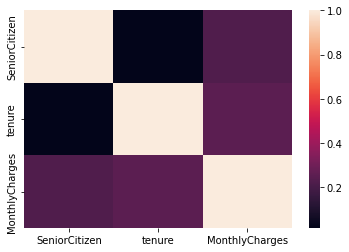

In [318]:
# between the numerical values 

sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

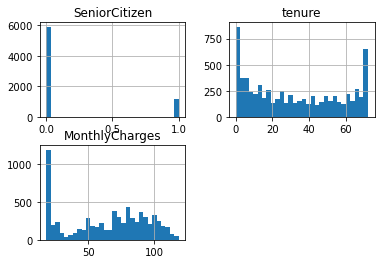

In [319]:
df.hist(bins=30)

<AxesSubplot:xlabel='Churn', ylabel='count'>

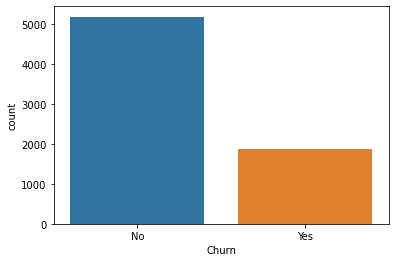

In [320]:
sns.countplot(x='Churn', data=df)

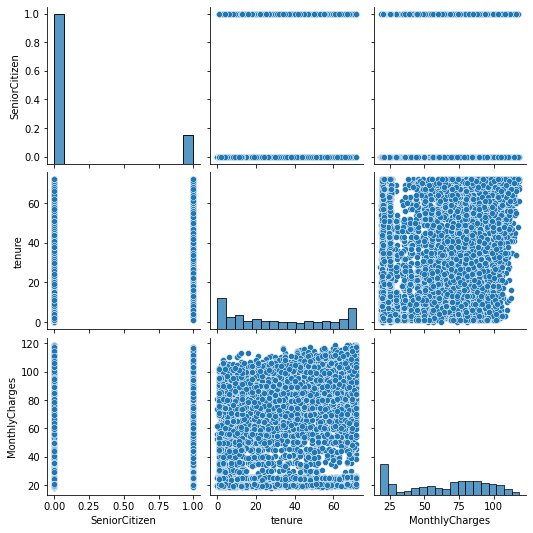

In [321]:
sns.pairplot(df)

From just doing these simple plots, looks like we don't have alot to work with right now, lets try turning some of the features like Yes or No into 1 and 0 in order to plot, same with the final predict value 

In [322]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [323]:
df['gender']= df['gender'].map({'Female': 0, 'Male': 1})

In [324]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [354]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
df[np.isnan(df['TotalCharges'])]
df[df['tenure'] == 0].index
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index
df.fillna(df["TotalCharges"].mean())
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [355]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,1,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [356]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


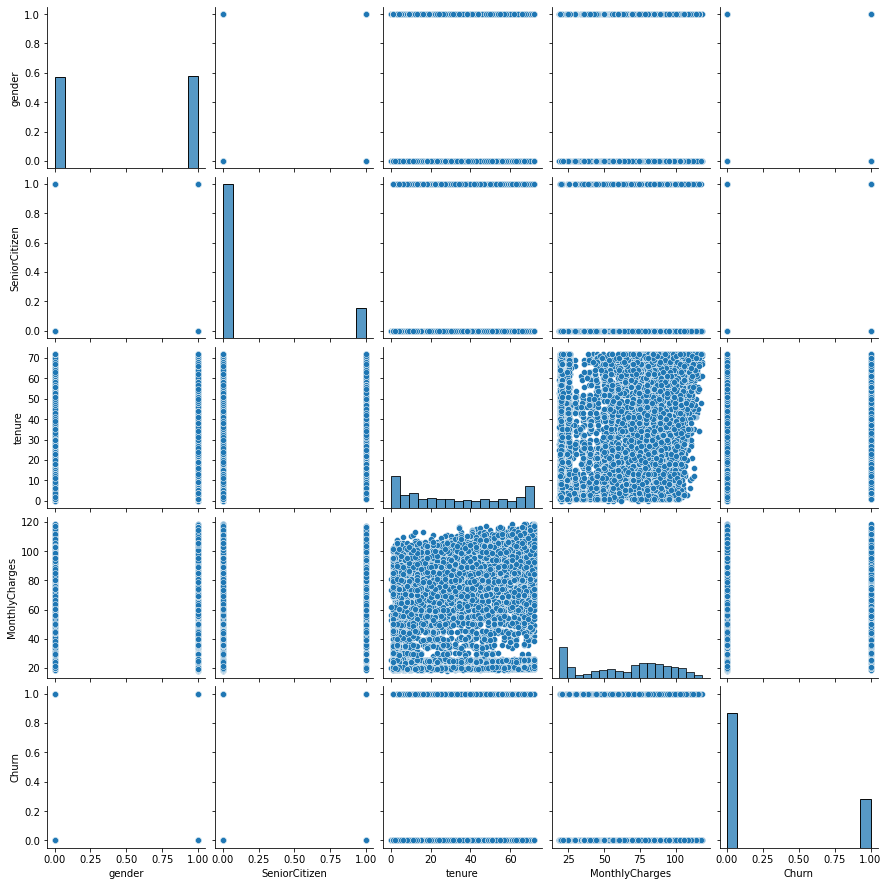

In [326]:
sns.pairplot(df)

In [327]:
df.corr()

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.220173,0.150889
tenure,0.005106,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,-0.014569,0.220173,0.247900,1.000000,0.193356
Churn,-0.008612,0.150889,-0.352229,0.193356,1.000000


<AxesSubplot:>

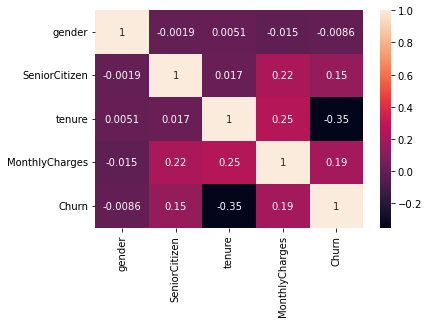

In [328]:
sns.heatmap(df.corr(), annot=True)

In [329]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

<AxesSubplot:>

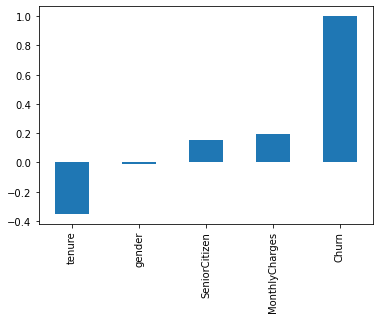

In [330]:
df.corr()['Churn'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Churn', ylabel='count'>

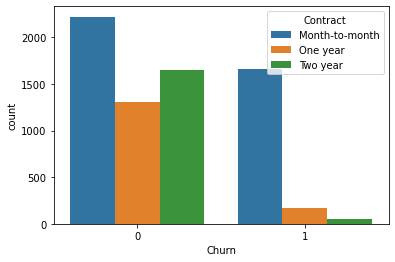

In [331]:
sns.countplot(x='Churn', hue='Contract', data=df)

From this we can see that alot of people that are Churned are ones that are on Month to Month contracts compared to the other ones

<AxesSubplot:xlabel='Churn', ylabel='count'>

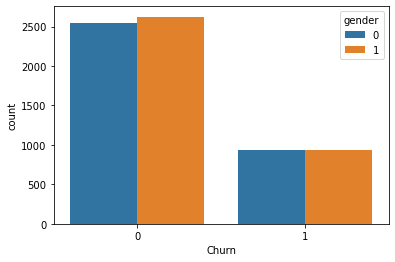

In [332]:
# Male to female comparison 
sns.countplot(x='Churn', hue='gender', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

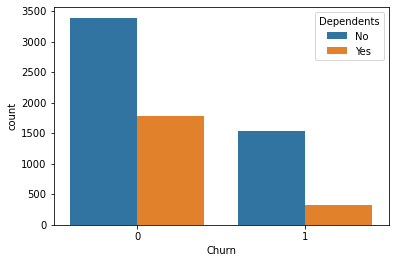

In [333]:
sns.countplot(x='Churn', hue='Dependents', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

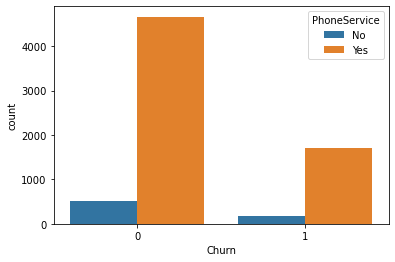

In [334]:
sns.countplot(x='Churn', hue='PhoneService', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

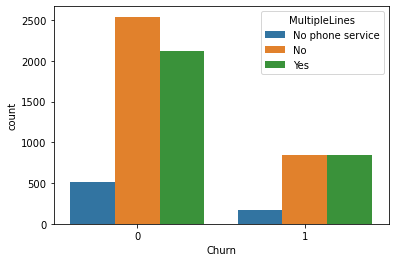

In [335]:
sns.countplot(x='Churn', hue='MultipleLines', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

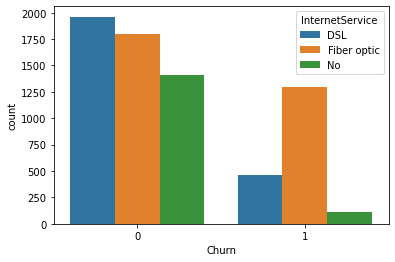

In [336]:
sns.countplot(x='Churn', hue='InternetService', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

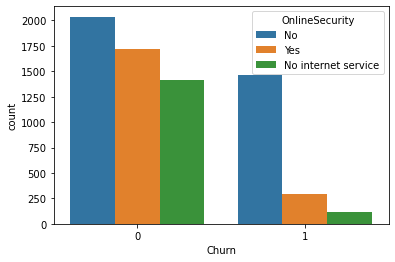

In [337]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

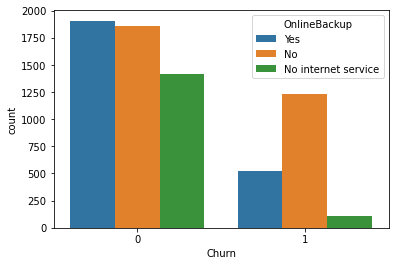

In [338]:
sns.countplot(x='Churn', hue='OnlineBackup', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

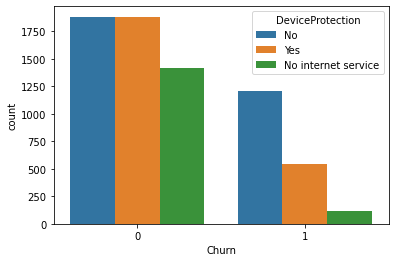

In [339]:
sns.countplot(x='Churn', hue='DeviceProtection', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

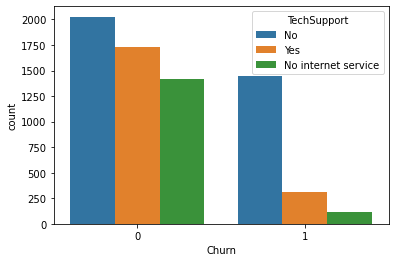

In [340]:
sns.countplot(x='Churn', hue='TechSupport', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

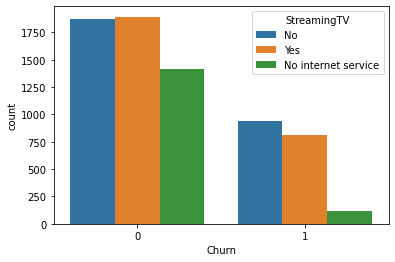

In [341]:
sns.countplot(x='Churn', hue='StreamingTV', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

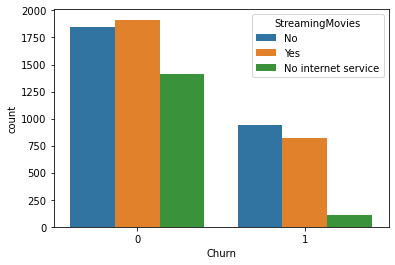

In [342]:
sns.countplot(x='Churn', hue='StreamingMovies', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

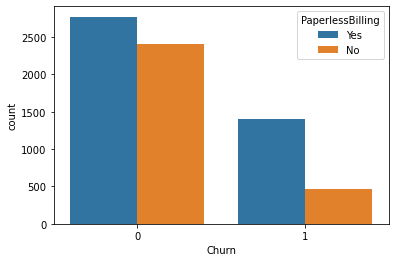

In [343]:
sns.countplot(x='Churn', hue='PaperlessBilling', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

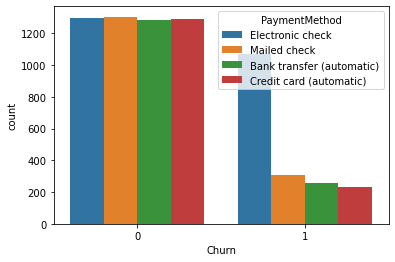

In [344]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df)

After comparing all the data with churn we can see that most people are doing the very bare minimum when it comes to sticking with this service. Meaning they are either trying it out, have a free trial, or have found a better alternative

We can see this because they are very much inclinded to not having backups, not reaching out to tech support, etc. 

Now using this knowledge. Are we able to predict, given the information of a new user, how likley they are to actually stick with the service. Meaning will a user that does more than the bare minimum appear if so are we able to classify them correctly through code 

What we have gained insight to 
- New customers churn 
- Customers with higher monthly charges churn 
- customer without tech support
- Customers who only use electronic checks
- Customers who dont steam movies 
- Customers who dont have device protection etc.

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [359]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


We need to make sure our numerical values are scaled to reasonable values so that the model we are using doesn't fail and get the wrong readings 

In [360]:
from sklearn.preprocessing import StandardScaler

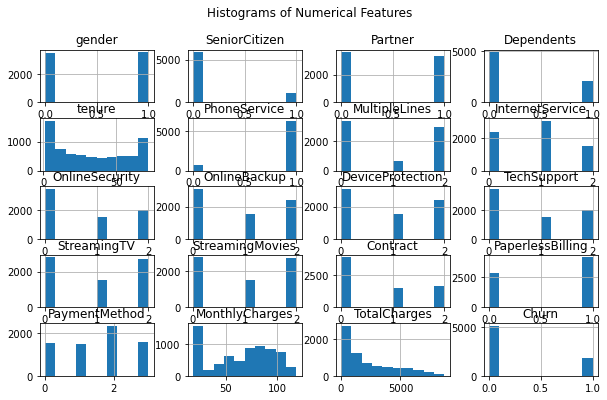

In [361]:
df.hist(bins=10, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [362]:
scaler = StandardScaler()
columns_to_scale = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
scaled_data = scaler.fit_transform(df[columns_to_scale])
df_standard_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)


print("Standard Scaled Data:\n", df_standard_scaled.describe())

df_standard_scaled.head()

Standard Scaled Data:
              tenure  MonthlyCharges  SeniorCitizen
count  7.032000e+03    7.032000e+03   7.032000e+03
mean  -1.214741e-16    9.652878e-17   1.946443e-16
std    1.000071e+00    1.000071e+00   1.000071e+00
min   -1.280248e+00   -1.547283e+00  -4.403271e-01
25%   -9.542963e-01   -9.709769e-01  -4.403271e-01
50%   -1.394171e-01    1.845440e-01  -4.403271e-01
75%    9.199259e-01    8.331482e-01  -4.403271e-01
max    1.612573e+00    1.793381e+00   2.271039e+00


,tenure,MonthlyCharges,SeniorCitizen
0,-1.280248,-1.161694,-0.440327
1,0.064303,-0.260878,-0.440327
2,-1.239504,-0.363923,-0.440327
3,0.512486,-0.747850,-0.440327
4,-1.239504,0.196178,-0.440327


In [363]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [377]:
model = LogisticRegression()

In [378]:
model.fit(X_train, y_train)

/Users/jimmychavada/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [379]:
pred = model.predict(X_test)

In [380]:
from sklearn.metrics import confusion_matrix, classification_report

In [381]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1373  176]
 [ 235  326]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.58      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



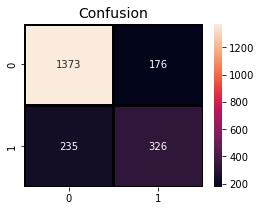

In [382]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Confusion",fontsize=14)
plt.show()

Based on this confusion matrix above, we can see that the model predicted 1373 correct, 176 wrong for not Churn. and 235 wrong and 326 correct for Churn 

In [384]:
from sklearn.svm import SVC

In [385]:
model_2 = SVC()

In [386]:
model_2.fit(X_train, y_train)

SVC()

In [389]:
model_2pred =model_2.predict(X_test)

In [390]:
print(confusion_matrix(y_test, model_2pred))
print(classification_report(y_test, model_2pred))

[[1549    0]
 [ 561    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



/Users/jimmychavada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/jimmychavada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/jimmychavada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

